In [0]:
dataUrl = "https://raw.githubusercontent.com/rani700/SSIM/master/SSIM/data/simplified_PM25.csv"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv(dataUrl)

In [0]:
scaler = StandardScaler()
scaler.fit(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']] = scaler.transform(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])

In [0]:
df.head()

,date,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,winddirect_0,winddirect_1,winddirect_2,winddirect_3
0,2/01/2010 0:00,0.341541,-1.235589,-1.349849,0.345886,-0.441890,-0.069372,-0.137706,0,0,1,0
1,2/01/2010 1:00,0.549424,-1.166285,-1.349849,0.345886,-0.424098,-0.069372,-0.137706,0,0,1,0
2,2/01/2010 2:00,0.669777,-0.889069,-1.431862,0.443244,-0.406306,-0.069372,-0.137706,0,0,1,0
3,2/01/2010 3:00,0.910484,-0.611852,-1.431862,0.540603,-0.370522,1.245425,-0.137706,0,0,1,0
4,2/01/2010 4:00,0.440012,-0.611852,-1.431862,0.540603,-0.352730,2.560223,-0.137706,0,0,1,0


In [0]:
df.keys()

Index(['date', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'winddirect_0', 'winddirect_1', 'winddirect_2', 'winddirect_3'],
      dtype='object')

In [0]:
pm25 = df.iloc[:, 1].values

In [0]:
df.iloc[:].values.shape

(43800, 12)

In [0]:
df.set_index('date', inplace=True)

In [0]:
df.iloc[:].values.shape

(43800, 11)

In [0]:
myData = df.iloc[:].values

In [0]:
N = 25
O = 5
P = 25

In [0]:
X = []
y = []
for i in range(len(myData) - (N + O + P)):
  temp = []
  # temp.append(pm25[i : i+N] + [0 for _ in range(O)] + pm25[i+N+O : i+N+O+P])
  temp1 = myData[i : i+N]
  temp2 = [[0 for __ in range(11)] for _ in range(O)]
  temp3 = myData[i+N+O : i+N+O+P]
  X.append(np.append(np.append(temp1, temp2), temp3))
  y.append(pm25[i+N : i+N+O])


In [0]:
X = np.array(X)
y = np.array(y)

In [0]:
X = X.reshape(X.shape[0], 11, N+O+P)

In [0]:
print(X.shape)
print(y.shape)

(43745, 11, 55)
(43745, 5)


In [0]:
# X[0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

Using TensorFlow backend.


In [0]:
from keras.layers import LSTM, Bidirectional

In [0]:
!pip install keras-self-attention

In [0]:
from keras_self_attention import SeqSelfAttention

In [0]:
from keras.layers import Dropout

In [0]:
# from keras import losses

In [0]:
# X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [0]:
X_test.shape

(10937, 11, 55)

In [0]:
X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [0]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X.shape[1], X.shape[2])))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(64))
model.add(Dense(O))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [62]:
model.fit(X_test, y_test, epochs=20, verbose=1)

Epoch 1/20
10937/10937 [==============================] - 22s 2ms/step - loss: 0.3487 - acc: 0.2788
Epoch 2/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.2318 - acc: 0.3294
Epoch 3/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.1608 - acc: 0.3591
Epoch 4/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.1246 - acc: 0.4045
Epoch 5/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.1081 - acc: 0.4263
Epoch 6/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.0987 - acc: 0.4399
Epoch 7/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.0922 - acc: 0.4486
Epoch 8/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.0885 - acc: 0.4483
Epoch 9/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.0852 - acc: 0.4554
Epoch 10/20
10937/10937 [==============================] - 19s 2ms/step - loss: 0.0804 - acc: 0.4564

In [0]:
ytest_hat = model.predict(X_test)

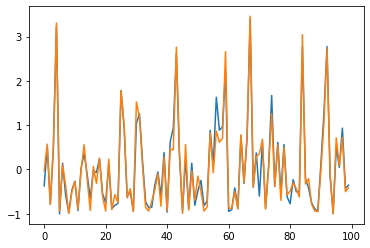

In [64]:
plt.plot(ytest_hat[:100, 0])
plt.plot(y_test[:100, 0])
plt.show()

In [66]:
mean_squared_error(y_test,ytest_hat)

0.051527660137683486

In [0]:
loss_history = model.history.history['loss']

In [68]:
loss_history

[0.3486918417531328,
 0.2318285841110246,
 0.16082167598723143,
 0.12455249517880836,
 0.10809286145151582,
 0.09872281939933011,
 0.09215856450119805,
 0.08847101582075437,
 0.08516195930708825,
 0.08043712722657857,
 0.0795533624484071,
 0.07755249652943778,
 0.07540549370630945,
 0.07168366620432058,
 0.06893583484143195,
 0.06656709398614147,
 0.06356505672505713,
 0.06112521183867335,
 0.05971826678142803,
 0.05838599540630424]

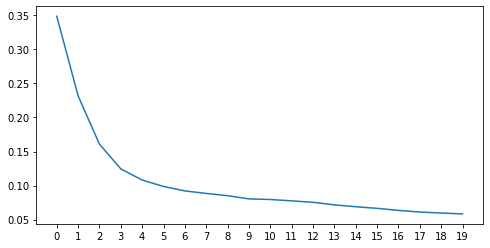

In [69]:
plt.figure(figsize=(8,4))
plt.xticks(np.arange(0,25,1))
plt.plot(range(len(loss_history)),loss_history)